# Lab 04

### Sudarsan Haridas

### 300353099

**LOAD THE PYTHON LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import confusion_matrix, classification_report

#importing necessary python libraries...

/Users/suduharidas/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


**READ THE DATA**

In [2]:
df = pd.read_csv('Lab4_car_emission.csv')

df_copy = df.copy()

#reading the data and keeping a copy of the original dataset..

In [3]:
df.head()

,make,type,transmission,fuel,fuel_comb,emissions,engine(l),cylinder
0,mazda,two_seater,automatic_shift,z,7.9,186,2.0,4
1,dodge,full_size,automatic,e,14.0,234,3.6,6
2,mercedes_benz,full_size,automatic,z,15.1,355,6.0,12
3,infiniti,suv,continuously_variable,x,8.7,200,2.5,4
4,jeep,suv,continuously_variable,x,11.1,255,2.4,4


**DROP UNNEEDED DATA**

In [4]:
df.info()

#There are no null values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          6444 non-null   object 
 1   type          6444 non-null   object 
 2   transmission  6444 non-null   object 
 3   fuel          6444 non-null   object 
 4   fuel_comb     6444 non-null   float64
 5   emissions     6444 non-null   int64  
 6   engine(l)     6444 non-null   float64
 7   cylinder      6444 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 402.9+ KB


In [5]:
df.isnull().sum().sum()

0

**CREATE DUMMY VALUES FOR DATAFRAME**

In [6]:
target = df.emissions

features = df.drop('emissions', axis = 1)

#splitting features and target variable...

In [7]:
features = pd.get_dummies(features, drop_first = True)

#creating dummy columns for categorical variables...

**PREPARE THE FEATURE AND TARGET VARIABLE**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 99)

#training and testing data split..

**CREATING PIPELINE**

In [9]:
name_of_model = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 
                 'GradientBoosting Regressor', 'AdaBoost Regressor', 'XGBoost Regressor', 
                 'CatBoost Regressor', 'LightGBM Regressor', 'SGD Regressor']

score_of_model = []


list_of_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators = 100),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    XGBRegressor(),
    CatBoostRegressor(learning_rate = 0.1,verbose = False),
    LGBMRegressor(learning_rate = 0.1, n_estimators = 100),
    SGDRegressor(max_iter = 10000, tol = 0.0001, eta0 = 0.01)
]


#list of model names..
#empty list to hold score of each model...
#List of models

In [10]:
for i, reg in enumerate(list_of_models):
    
    pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Feature Selection', SelectFromModel(estimator = RandomForestRegressor( n_estimators = 100))),
        (name_of_model[i], reg)
    ]
    )
    
    pipe.fit(x_train, y_train)
    
    score_of_model.append(pipe.score(x_test, y_test))
    
    
    
#creating a pipeline of feature scaling, selection and regression models...

In [11]:
scores = pd.DataFrame(zip(name_of_model, score_of_model), columns = ['Regressor', 'R^2'])

#creating a dataframe of model scores...

**SELECT THE BEST PIPE**

In [12]:
scores.sort_values( by = ['R^2'], ascending = False)

#sorting models by R^2 score..

,Regressor,R^2
6,CatBoost Regressor,0.989861
2,Random Forest Regressor,0.989838
1,Decision Tree,0.989779
5,XGBoost Regressor,0.989777
3,GradientBoosting Regressor,0.989462
7,LightGBM Regressor,0.988776
0,Linear Regression,0.984579
8,SGD Regressor,0.984383
4,AdaBoost Regressor,0.956781


CatBoost Regressor is the best model...

In [13]:
best_reg_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Feature Selection', SelectFromModel(estimator = RandomForestRegressor( n_estimators = 100))),
        ('CatBoost Regressor', CatBoostRegressor(learning_rate = 0.1,verbose = False))
    ]
    )

best_reg_pipe.fit(x_train, y_train)

y_pred = best_reg_pipe.predict(x_test)

#predicting using best regression model..

Text(0.5, 1.0, 'CatBoost Regressor Model')

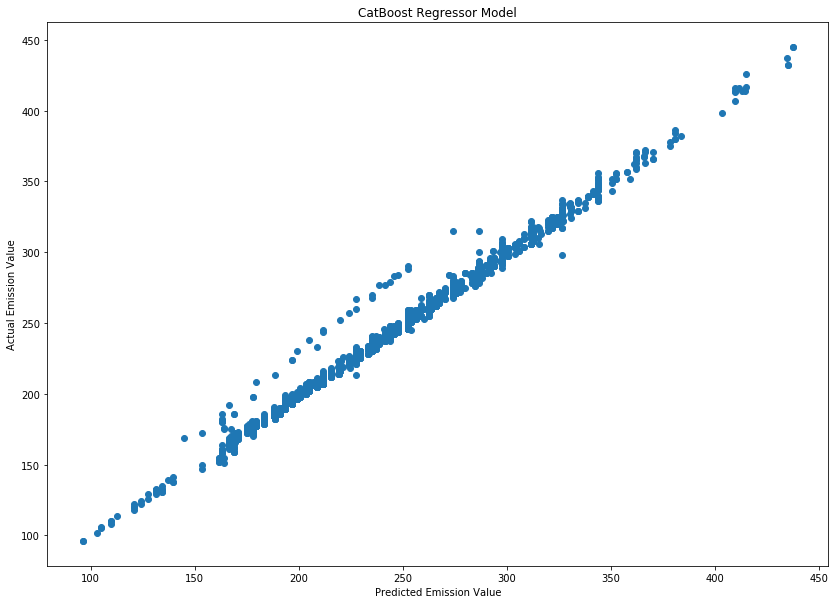

In [14]:
plt.figure(figsize = (14,10))

plt.scatter(y_pred, y_test) 

plt.xlabel('Predicted Emission Value')
plt.ylabel('Actual Emission Value')

plt.title('CatBoost Regressor Model')

#Plotting predicted and actual values to visualize the model's performance

The model looks to perform very good, as indicated by the above visualization and also the R^2 score...